In [298]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Scraping covid 19 data from wikipedia.

In [299]:
url = 'https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory'
data = requests.get(url).text

# soup object
soup = BeautifulSoup(data, 'html.parser')

In [300]:
table = soup.find('table', {'class': "wikitable sortable tpl-blanktable covid19-countrynames"})

In [301]:
columns = ['country', 'jul_1', 'aug_1', 'sep_1', 'oct_1', 'nov_1', 'dec_1']
covid_deaths_on_start_of_every_month = pd.DataFrame(columns = columns)

for row in table.tbody.find_all('tr'):
    row_data = row.find_all('td')

    if row_data != []:
        country = row_data[0].text.strip()
        jul_1 = row_data[1].text.strip()
        aug_1 = row_data[2].text.strip()
        sep_1 = row_data[3].text.strip()
        oct_1 = row_data[4].text.strip()
        nov_1 = row_data[5].text.strip()
        dec_1 = row_data[6].text.strip()

        covid_deaths_on_start_of_every_month = covid_deaths_on_start_of_every_month.append({
            'country': country,
            'jul_1' : jul_1,
            'aug_1' : aug_1 ,
            'sep_1' : sep_1,
            'oct_1' : oct_1,
            'nov_1' : nov_1,
            'dec_1' : dec_1}, ignore_index = True)

covid_deaths_on_start_of_every_month = covid_deaths_on_start_of_every_month[1:]
covid_deaths_on_start_of_every_month['country'] = covid_deaths_on_start_of_every_month['country'].str.replace('*','')
covid_deaths_on_start_of_every_month.sort_values(by=['country'], inplace=True)

def to_int(column: str) -> None:
    """
    removes commas in passed column and converts column type to int
    :param column
    :return:
    """
    covid_deaths_on_start_of_every_month[column] = covid_deaths_on_start_of_every_month[column].str.replace(',','')
    covid_deaths_on_start_of_every_month[column] = covid_deaths_on_start_of_every_month[column].astype(int)

to_int('jul_1')
to_int('aug_1')
to_int('sep_1')
to_int('oct_1')
to_int('nov_1')
to_int('dec_1')


/tmp/ipykernel_78828/1199738489.py:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  covid_deaths_on_start_of_every_month['country'] = covid_deaths_on_start_of_every_month['country'].str.replace('*','')


In [302]:
covid_deaths_on_start_of_every_month

,country,jul_1,aug_1,sep_1,oct_1,nov_1,dec_1
68,Afghanistan,4962,6737,7123,7206,7280,7308
93,Albania,2456,2457,2498,2698,2924,3096
73,Algeria,3716,4254,5269,5812,5920,6071
214,American Samoa,0,0,0,0,0,0
175,Andorra,127,128,130,130,130,131
...,...,...,...,...,...,...,...
33,Vietnam,87,1306,11064,19301,22083,25252
207,Wallis and Futuna,7,7,7,7,7,7
108,Yemen,1361,1375,1472,1721,1889,1950
87,Zambia,2199,3389,3602,3648,3661,3667


In [303]:
url = 'https://worldpopulationreview.com/country-rankings/country-codes'
data = requests.get(url).text

# soup object
soup = BeautifulSoup(data, 'html.parser')

In [304]:
table2 = soup.find('table')

In [305]:
columns = ['country', 'code_2', 'code_3']
country_codes = pd.DataFrame(columns = columns)

for row in table2.tbody.find_all('tr'):
    row_data = row.find_all('td')

    if row_data != []:
        country = row_data[0].text.strip()
        code_2 = row_data[1].text.strip()
        code_3 = row_data[2].text.strip()

        country_codes = country_codes.append({
            'country': country,
            'code_2' : code_2,
            'code_3' : code_3}, ignore_index = True)

In [306]:
country_codes

,country,code_2,code_3
0,Afghanistan,AF,AFG
1,Albania,AL,ALB
2,Algeria,DZ,DZA
3,American Samoa,AS,ASM
4,Andorra,AD,AND
...,...,...,...
226,Wallis And Futuna,WF,WLF
227,Western Sahara,EH,ESH
228,Yemen,YE,YEM
229,Zambia,ZM,ZMB


In [307]:
countries = list(covid_deaths_on_start_of_every_month.country)
countries_updated = []
for country in countries:
    new = country.replace('\u202f','')
    countries_updated.append(new)

x = covid_deaths_on_start_of_every_month.drop(columns=['country'])
x['country'] = countries_updated


merged_data = pd.merge(country_codes, x, on="country")

In [308]:
merged_data

,country,code_2,code_3,jul_1,aug_1,sep_1,oct_1,nov_1,dec_1
0,Afghanistan,AF,AFG,4962,6737,7123,7206,7280,7308
1,Albania,AL,ALB,2456,2457,2498,2698,2924,3096
2,Algeria,DZ,DZA,3716,4254,5269,5812,5920,6071
3,American Samoa,AS,ASM,0,0,0,0,0,0
4,Andorra,AD,AND,127,128,130,130,130,131
...,...,...,...,...,...,...,...,...,...
206,Venezuela,VE,VEN,3101,3576,4010,4454,4884,5144
207,Vietnam,VN,VNM,87,1306,11064,19301,22083,25252
208,Yemen,YE,YEM,1361,1375,1472,1721,1889,1950
209,Zambia,ZM,ZMB,2199,3389,3602,3648,3661,3667


In [309]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
data = requests.get(url).text

# soup object
soup = BeautifulSoup(data, 'html.parser')

In [310]:
table3 = soup.find('table', {'class': "wikitable sortable"})
print(table3)

<table class="wikitable sortable">
<tbody><tr>
<th>Rank</th>
<th><a href="/wiki/List_of_sovereign_states" title="List of sovereign states">Country or dependent territory</a></th>
<th><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">Region</a></th>
<th>Population</th>
<th>% of world</th>
<th>Date</th>
<th>Source (official or from the <a href="/wiki/United_Nations" title="United Nations">United Nations</a>)</th>
<th>Notes
</th></tr>
<tr>
<td align="center"><b>–</b>
</td>
<td><b>N/A</b>
</td>
<td align="center"><b><span class="flagicon" style="padding-left:25px;"> </span>World</b></td>
<td style="text-align:center"><b> 7,917,415,000</b></td>
<td><b>N/A</b></td>
<td><b><span data-sort-value="000000002021-12-20-0000" style="white-space:nowrap">20 Dec 2021</span></b></td>
<td style="text-align:left"><b>UN projection<sup class="reference" id="cite_ref-unpop_2-1"><a href="#cite_note-unpop-2">[2]</a></sup></b></td>
<td><b>N/A</b>
</td></tr>
<tr>
<th>1
</th>
<td scope="r

In [311]:
columns = ['country', 'region', 'population']
country_population = pd.DataFrame(columns = columns)

for row in table3.tbody.find_all('tr'):
    row_data = row.find_all('td')

    if row_data != []:
        country = row_data[0].text.strip()
        region = row_data[1].text.strip()
        population = row_data[2].text.strip()

        country_population = country_population.append({
            'country': country,
            'region': region,
            'population' : population}, ignore_index = True)

country_population = country_population[1:]
country_population.sort_values(by=['country'], inplace=True)

def to_int(column: str) -> None:
    """
    removes commas in passed column and converts column type to int
    :param column
    :return:
    """
    country_population[column] = country_population[column].str.replace(',','')
    country_population[column] = country_population[column].astype(int)

to_int('population')

In [312]:
country_population

,country,region,population
185,Abkhazia,Asia,245424
43,Afghanistan,Asia,32890171
138,Albania,Europe,2829741
32,Algeria,Africa,44700000
208,American Samoa (United States),Oceania,56951
...,...,...,...
170,Western Sahara,Africa,612000
48,Yemen,Asia,30491000
65,Zambia,Africa,18400556
73,Zimbabwe,Africa,15790716


In [313]:
merged_data_final = pd.merge(country_population, merged_data, on='country')

In [314]:
merged_data_final

,country,region,population,code_2,code_3,jul_1,aug_1,sep_1,oct_1,nov_1,dec_1
0,Afghanistan,Asia,32890171,AF,AFG,4962,6737,7123,7206,7280,7308
1,Albania,Europe,2829741,AL,ALB,2456,2457,2498,2698,2924,3096
2,Algeria,Africa,44700000,DZ,DZA,3716,4254,5269,5812,5920,6071
3,Andorra,Europe,78015,AD,AND,127,128,130,130,130,131
4,Angola,Africa,32097671,AO,AGO,900,1011,1217,1537,1710,1733
...,...,...,...,...,...,...,...,...,...,...,...
180,Venezuela,Americas,28705000,VE,VEN,3101,3576,4010,4454,4884,5144
181,Vietnam,Asia,97580000,VN,VNM,87,1306,11064,19301,22083,25252
182,Yemen,Asia,30491000,YE,YEM,1361,1375,1472,1721,1889,1950
183,Zambia,Africa,18400556,ZM,ZMB,2199,3389,3602,3648,3661,3667


Collecting data from api

In [368]:
import requests

url = "https://covid-193.p.rapidapi.com/statistics"

headers = {
    'x-rapidapi-host': "covid-193.p.rapidapi.com",
    'x-rapidapi-key': "c10891b130msh7066b4610560f36p19f63fjsn6db350d167df"
    }

response = requests.request("GET", url, headers=headers)

print(response.text)

{"get":"statistics","parameters":[],"errors":[],"results":236,"response":[{"continent":"Oceania","country":"New-Caledonia","population":289523,"cases":{"new":"+15","active":180,"critical":4,"recovered":12074,"1M_pop":"43292","total":12534},"deaths":{"new":null,"1M_pop":"967","total":280},"tests":{"1M_pop":"147677","total":42756},"day":"2021-12-21","time":"2021-12-21T14:45:04+00:00"},{"continent":"Oceania","country":"Vanuatu","population":317362,"cases":{"new":null,"active":0,"critical":null,"recovered":5,"1M_pop":"19","total":6},"deaths":{"new":null,"1M_pop":"3","total":1},"tests":{"1M_pop":"72472","total":23000},"day":"2021-12-21","time":"2021-12-21T14:45:04+00:00"},{"continent":"Asia","country":"Taiwan","population":23880029,"cases":{"new":"+10","active":217,"critical":null,"recovered":15759,"1M_pop":"705","total":16826},"deaths":{"new":null,"1M_pop":"36","total":850},"tests":{"1M_pop":"375510","total":8967192},"day":"2021-12-21","time":"2021-12-21T14:45:04+00:00"},{"continent":"Euro

In [369]:
# getting json data from the response
data = response.json()
data = data['response']
print(data)

[{'continent': 'Oceania', 'country': 'New-Caledonia', 'population': 289523, 'cases': {'new': '+15', 'active': 180, 'critical': 4, 'recovered': 12074, '1M_pop': '43292', 'total': 12534}, 'deaths': {'new': None, '1M_pop': '967', 'total': 280}, 'tests': {'1M_pop': '147677', 'total': 42756}, 'day': '2021-12-21', 'time': '2021-12-21T14:45:04+00:00'}, {'continent': 'Oceania', 'country': 'Vanuatu', 'population': 317362, 'cases': {'new': None, 'active': 0, 'critical': None, 'recovered': 5, '1M_pop': '19', 'total': 6}, 'deaths': {'new': None, '1M_pop': '3', 'total': 1}, 'tests': {'1M_pop': '72472', 'total': 23000}, 'day': '2021-12-21', 'time': '2021-12-21T14:45:04+00:00'}, {'continent': 'Asia', 'country': 'Taiwan', 'population': 23880029, 'cases': {'new': '+10', 'active': 217, 'critical': None, 'recovered': 15759, '1M_pop': '705', 'total': 16826}, 'deaths': {'new': None, '1M_pop': '36', 'total': 850}, 'tests': {'1M_pop': '375510', 'total': 8967192}, 'day': '2021-12-21', 'time': '2021-12-21T14:4

In [370]:
columns = ["country", "cases_1m_pop", "cases_active", "cases_critical", "cases_new", "cases_recovered", "cases_total", "deaths_1m_pop", "death_total"]
api_data = []
for d in data:
    country = d['country']
    cases_1m_pop = d['cases']['1M_pop']
    cases_active = d['cases']['active']
    cases_critical = d['cases']['critical']
    cases_new = d['cases']['new']
    cases_recovered = d['cases']['recovered']
    cases_total = d['cases']['total']
    deaths_1m_pop = d['deaths']['1M_pop']
    death_total = d['deaths']['total']
    api_data.append([country,cases_1m_pop,cases_active,cases_critical,cases_new,cases_recovered,cases_total,deaths_1m_pop,death_total])

api_dataframe = pd.DataFrame(api_data, columns = columns)

In [371]:
api_dataframe.sort_values(by=['country'], inplace=True )

In [377]:
api_dataframe.fillna(0, inplace=True)

In [378]:
api_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 103 to 178
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          236 non-null    object 
 1   cases_1m_pop     236 non-null    float64
 2   cases_active     236 non-null    float64
 3   cases_critical   236 non-null    float64
 4   cases_new        236 non-null    object 
 5   cases_recovered  236 non-null    float64
 6   cases_total      236 non-null    int64  
 7   deaths_1m_pop    236 non-null    float64
 8   death_total      236 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 18.4+ KB


In [379]:
def to_float(column: str) -> None:
    """
    removes commas in passed column and converts column type to int
    :param column
    :return:
    """
    api_dataframe[column] = api_dataframe[column].astype(float)

to_float('cases_1m_pop')
to_float('deaths_1m_pop')

In [382]:
api_dataframe.head(10)

,country,cases_1m_pop,cases_active,cases_critical,cases_new,cases_recovered,cases_total,deaths_1m_pop,death_total
103,Afghanistan,3925.0,5187.0,1124.0,+19,145294.0,157816,182.0,7335.0
218,Africa,0.0,670708.0,1538.0,+3402,8412573.0,9309918,0.0,226637.0
143,Albania,71662.0,5178.0,23.0,+120,197547.0,205897,1104.0,3172.0
184,Algeria,4773.0,60816.0,22.0,+243,147829.0,214835,138.0,6190.0
224,All,35405.0,22879374.0,88742.0,+163662,247714732.0,275974405,690.2,5380299.0
44,Andorra,271957.0,1761.0,31.0,+513,19164.0,21062,1769.0,137.0
91,Angola,1923.0,526.0,3.0,+148,63822.0,66086,51.0,1738.0
79,Anguilla,107178.0,42.0,0.0,+37,1582.0,1629,329.0,5.0
33,Antigua-and-Barbuda,42354.0,42.0,1.0,0,4039.0,4198,1180.0,117.0
210,Argentina,117785.0,40515.0,795.0,+5337,5237599.0,5395044,2553.0,116930.0


In [383]:
final_merge = pd.merge(merged_data_final, api_dataframe, on="country")

Displaying stats on the final data frame

In [396]:
final_merge.head(10)

,country,region,population,code_2,code_3,jul_1,aug_1,sep_1,oct_1,nov_1,dec_1,cases_1m_pop,cases_active,cases_critical,cases_new,cases_recovered,cases_total,deaths_1m_pop,death_total
0,Afghanistan,Asia,32890171,AF,AFG,4962,6737,7123,7206,7280,7308,3925.0,5187.0,1124.0,+19,145294.0,157816,182.0,7335.0
1,Albania,Europe,2829741,AL,ALB,2456,2457,2498,2698,2924,3096,71662.0,5178.0,23.0,+120,197547.0,205897,1104.0,3172.0
2,Algeria,Africa,44700000,DZ,DZA,3716,4254,5269,5812,5920,6071,4773.0,60816.0,22.0,+243,147829.0,214835,138.0,6190.0
3,Andorra,Europe,78015,AD,AND,127,128,130,130,130,131,271957.0,1761.0,31.0,+513,19164.0,21062,1769.0,137.0
4,Angola,Africa,32097671,AO,AGO,900,1011,1217,1537,1710,1733,1923.0,526.0,3.0,+148,63822.0,66086,51.0,1738.0
5,Argentina,Americas,45808747,AR,ARG,93668,105586,111607,115179,115950,116554,117785.0,40515.0,795.0,+5337,5237599.0,5395044,2553.0,116930.0
6,Armenia,Asia,2963900,AM,ARM,4517,4619,4857,5339,6379,7610,115719.0,6803.0,0.0,+137,329128.0,343845,2663.0,7914.0
7,Australia,Oceania,25917896,AU,AUS,910,923,1006,1289,1734,2006,9994.0,34636.0,112.0,+4489,222384.0,259174,83.0,2154.0
8,Austria,Europe,8976467,AT,AUT,10508,10528,10583,10810,11114,12064,138074.0,38964.0,477.0,+2528,1201459.0,1253961,1491.0,13538.0
9,Azerbaijan,Asia,10139196,AZ,AZE,4974,5023,5636,6525,7074,7856,59465.0,15349.0,0.0,+577,587338.0,610895,799.0,8208.0


The dataframe is sorted in order

In [397]:
# displaying sample data
final_merge.sample(10)

,country,region,population,code_2,code_3,jul_1,aug_1,sep_1,oct_1,nov_1,dec_1,cases_1m_pop,cases_active,cases_critical,cases_new,cases_recovered,cases_total,deaths_1m_pop,death_total
135,Switzerland,Europe,8717105,CH,CHE,10366,10387,10489,10683,10834,11091,137014.0,247941.0,302.0,+5872,938544.0,1198521,1376.0,12036.0
23,Bulgaria,Europe,6875040,BG,BGR,18061,18213,18896,20882,23999,28453,105767.0,95827.0,506.0,+2001,600728.0,726794,4401.0,30239.0
1,Albania,Europe,2829741,AL,ALB,2456,2457,2498,2698,2924,3096,71662.0,5178.0,23.0,+120,197547.0,205897,1104.0,3172.0
59,Honduras,Americas,9450711,HN,HND,6980,7834,8850,9777,10240,10403,37378.0,244632.0,35.0,+39,123783.0,378843,1029.0,10428.0
77,Latvia,Europe,1879700,LV,LVA,2513,2556,2578,2717,3250,4179,144675.0,9871.0,81.0,+991,254119.0,268456,2407.0,4466.0
121,Russia,"Europe, Asia",146171015,RU,RUS,135886,159352,184014,208142,239693,276419,70314.0,913271.0,2300.0,+25907,9055199.0,10267719,2049.0,299249.0
17,Benin,Africa,12506347,BJ,BEN,104,108,128,159,161,161,1979.0,41.0,5.0,0,24705.0,24907,13.0,161.0
49,Gambia,Africa,2487000,GM,GMB,181,213,319,338,340,342,3995.0,62.0,1.0,0,9647.0,10051,136.0,342.0
45,Fiji,Oceania,898402,FJ,FJI,21,239,496,624,674,696,58115.0,749.0,0.0,+5,51205.0,52651,769.0,697.0
82,Liechtenstein,Europe,39151,LI,LIE,58,58,58,58,58,58,149599.0,314.0,18.0,+56,5346.0,5728,1776.0,68.0


Displaying shape of the dataset

In [389]:
final_merge.shape

(154, 19)

From The above shape we have data on 154 countries

In [391]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          154 non-null    object 
 1   region           154 non-null    object 
 2   population       154 non-null    int64  
 3   code_2           154 non-null    object 
 4   code_3           154 non-null    object 
 5   jul_1            154 non-null    int64  
 6   aug_1            154 non-null    int64  
 7   sep_1            154 non-null    int64  
 8   oct_1            154 non-null    int64  
 9   nov_1            154 non-null    int64  
 10  dec_1            154 non-null    int64  
 11  cases_1m_pop     154 non-null    float64
 12  cases_active     154 non-null    float64
 13  cases_critical   154 non-null    float64
 14  cases_new        154 non-null    object 
 15  cases_recovered  154 non-null    float64
 16  cases_total      154 non-null    int64  
 17  deaths_1m_pop   

In [394]:
final_merge.describe()

,population,jul_1,aug_1,sep_1,oct_1,nov_1,dec_1,cases_1m_pop,cases_active,cases_critical,cases_recovered,cases_total,deaths_1m_pop,death_total
count,1.540000e+02,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02,1.540000e+02,154.000000,154.000000
mean,4.481784e+07,20019.701299,21635.746753,23277.902597,24474.909091,25475.720779,26562.168831,62514.428571,62818.837662,448.168831,1.206564e+06,1.310214e+06,969.396104,27262.012987
std,1.623285e+08,61119.184357,65254.503390,68558.319866,70851.371525,72788.868671,74658.984206,61901.708759,155848.812575,1321.163346,3.538082e+06,3.663806e+06,1058.613123,76039.324498
min,1.795700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000
25%,2.631348e+06,341.500000,424.500000,502.000000,610.500000,646.750000,677.250000,5002.250000,778.750000,1.000000,3.049425e+04,3.919975e+04,118.750000,701.000000
50%,9.934984e+06,2044.500000,2626.000000,2903.500000,3019.500000,3232.500000,3412.500000,50910.000000,6446.000000,23.000000,2.146820e+05,2.619505e+05,594.500000,3439.000000
75%,3.178131e+07,10212.000000,10375.000000,13435.750000,15767.000000,16169.000000,17509.250000,102700.250000,40127.250000,202.500000,9.380572e+05,9.787912e+05,1522.750000,16469.500000
max,1.411779e+09,515985.000000,555460.000000,579574.000000,596122.000000,607694.000000,614376.000000,271957.000000,965420.000000,8944.000000,3.419506e+07,3.475216e+07,6013.000000,617905.000000


In [395]:
final_merge.to_csv("corona_virus_data.csv")

## Data visualisation

In [398]:
from matplotlib import pyplot as plt

Bar chart of population in each continent/region

In [450]:
regions = final_merge.region.unique()
deaths = []

for region in regions:
    count = final_merge[final_merge['region'] == region]['deaths_1m_pop'].sum()
    deaths.append(count)

print(deaths)

[22748.0, 69162.0, 11751.0, 41781.0, 855.0, 2049.0, 941.0]


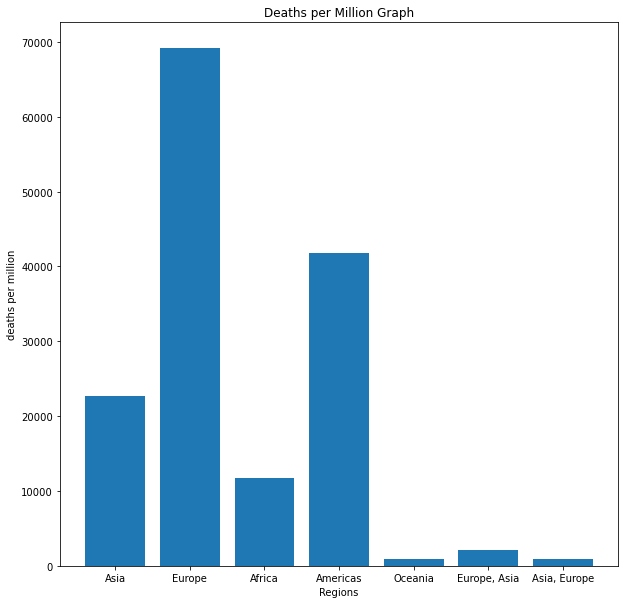

In [451]:
# plotting barchart on population
plt.figure(figsize=(10,10))
plt.bar(regions,deaths)
plt.title("Deaths per Million Graph")
plt.xlabel("Regions")
plt.ylabel('deaths per million')
# function to show the plot
plt.show()

[2101570.0, 4896546.0, 742454.0, 1640467.0, 68600.0, 70314.0, 107271.0]


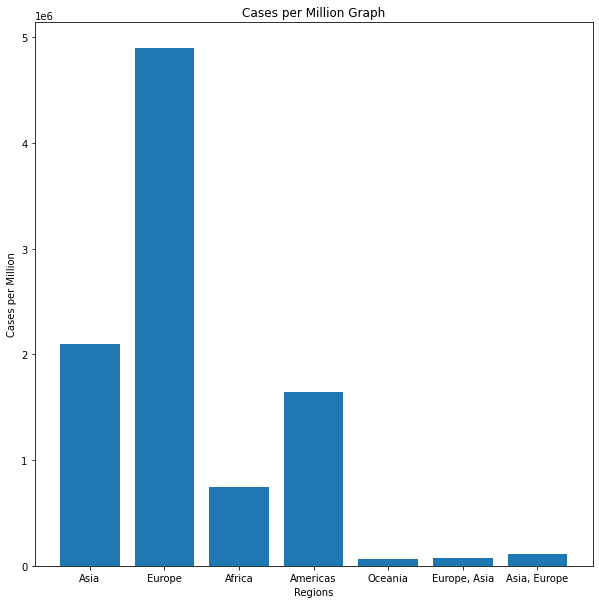

In [452]:
cases = []

for region in regions:
    count = final_merge[final_merge['region'] == region]['cases_1m_pop'].sum()
    cases.append(count)

print(cases)

# plotting barchart on population
plt.figure(figsize=(10,10))
plt.bar(regions,cases)
plt.title("Cases per Million Graph")
plt.xlabel("Regions")
plt.ylabel('Cases per Million')
# function to show the plot
plt.show()

Selecting 10 countries with the highest population an comparing covid related deaths from july to december

In [438]:
top_10 = final_merge.sort_values(by="population")[-11:-1]
top_10

,country,region,population,code_2,code_3,jul_1,aug_1,sep_1,oct_1,nov_1,dec_1,cases_1m_pop,cases_active,cases_critical,cases_new,cases_recovered,cases_total,deaths_1m_pop,death_total
44,Ethiopia,Africa,117876000,ET,ETH,4320,4385,4675,5582,6459,6755,3165.0,19125.0,138.0,+681,351059.0,377056,58.0,6872.0
70,Japan,Asia,125070000,JP,JPN,14781,15192,16041,17648,18268,18360,13741.0,1320.0,28.0,+148,1710413.0,1730112,146.0,18379.0
93,Mexico,Americas,126014024,MX,MEX,238055,245959,267253,283091,290717,293950,30050.0,346024.0,4798.0,+716,3290162.0,3934102,2276.0,297916.0
121,Russia,"Europe, Asia",146171015,RU,RUS,135886,159352,184014,208142,239693,276419,70314.0,913271.0,2300.0,+25907,9055199.0,10267719,2049.0,299249.0
12,Bangladesh,Asia,171899422,BD,BGD,14646,20916,26274,27531,27870,27981,9465.0,7512.0,1352.0,+291,1546071.0,1581634,168.0,28051.0
107,Nigeria,Africa,211401000,NG,NGA,2120,2149,2455,2721,2896,2977,1054.0,10610.0,11.0,+1368,211660.0,225255,14.0,2985.0
21,Brazil,Americas,214103664,BR,BRA,515985,555460,579574,596122,607694,614376,103437.0,183633.0,8318.0,+2094,21414318.0,22215856,2877.0,617905.0
110,Pakistan,Asia,225200000,PK,PAK,22281,23360,25788,27729,28449,28728,5686.0,9557.0,743.0,+270,1253298.0,1291737,127.0,28882.0
63,Indonesia,Asia,271350000,ID,IDN,58995,95723,133676,142026,143423,143840,15340.0,4829.0,0.0,+216,4112040.0,4260893,519.0,144024.0
62,India,Asia,1385779401,IN,IND,399459,424351,439020,448339,458437,469247,24825.0,79097.0,8944.0,0,34195060.0,34752164,341.0,478007.0


In [445]:
x = ['july','august','september','october','november','december']
ethiopia = list(top_10.loc[44,['jul_1','aug_1','sep_1','oct_1','nov_1','dec_1']])
japan = list(top_10.loc[70,['jul_1','aug_1','sep_1','oct_1','nov_1','dec_1']])
mexico = list(top_10.loc[93,['jul_1','aug_1','sep_1','oct_1','nov_1','dec_1']])
russia = list(top_10.loc[121,['jul_1','aug_1','sep_1','oct_1','nov_1','dec_1']])
bangladesh = list(top_10.loc[12,['jul_1','aug_1','sep_1','oct_1','nov_1','dec_1']])
nigeria = list(top_10.loc[107,['jul_1','aug_1','sep_1','oct_1','nov_1','dec_1']])
brazil = list(top_10.loc[21,['jul_1','aug_1','sep_1','oct_1','nov_1','dec_1']])
pakistan = list(top_10.loc[110,['jul_1','aug_1','sep_1','oct_1','nov_1','dec_1']])
indonesia = list(top_10.loc[63,['jul_1','aug_1','sep_1','oct_1','nov_1','dec_1']])
india = list(top_10.loc[62,['jul_1','aug_1','sep_1','oct_1','nov_1','dec_1']])

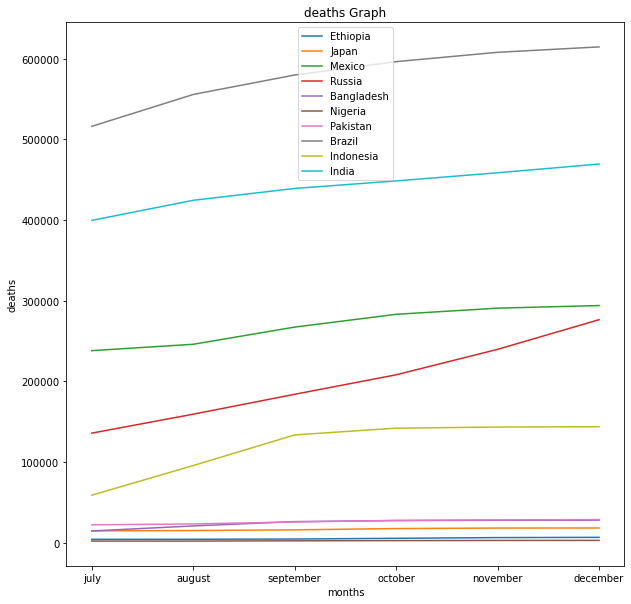

In [449]:
plt.figure(figsize=(10,10))
plt.plot(x, ethiopia, label = "Ethiopia")
plt.plot(x, japan, label = "Japan")
plt.plot(x, mexico, label = "Mexico")
plt.plot(x, russia, label = "Russia")
plt.plot(x, bangladesh, label = "Bangladesh")
plt.plot(x, nigeria, label = "Nigeria")
plt.plot(x, pakistan, label = "Pakistan")
plt.plot(x, brazil, label = "Brazil")
plt.plot(x, indonesia, label = "Indonesia")
plt.plot(x, india, label = "India")
plt.title("deaths Graph")
plt.xlabel("months")
plt.ylabel('deaths')
plt.legend()
# function to show the plot
plt.show()